In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 200

dt = 1/ N_prices # time step

In [3]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

agent = SAC_Agent([3], env=env, memory_size=50000, alpha= 0.008, beta= 0.008, tau = 0.0005, reward_scale=5, batch_size=1)

train_start = time.time()
epochs_start = time.time()

epoch_num = 300


train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    states_before, actions, rewards, states_next, dones = [], [], [], [], []

    # print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        # print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        # print("ACTION: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        # print("State I arrived: ", env.state_now)
        # print("Real state I arrived: ", env.state_now[0]*100, env.state_now[1], env.state_now[2]*100)
        # print("Reward I gained: ", reward)

        # if reward>=0:
        #     reward *=2 
        states_before.append(state_now)       
        actions.append(action)       
        rewards.append(reward)       
        states_next.append(state_next)       
        dones.append(done)       


        
    agent.remember(state_now, action, reward, state_next, done)
    # print("Total reward: ", env.reward_total)
    agent.learn()



    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print(env.reward_total)
    # print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


-81.64755278999893
-57.09332544549714
-40.67534734308416
-43.35737981614436
-82.87817151094737
-85.34802771493761
-165.77538508904706
-151.02013381525873
-48.20554228043604
-81.01744425956812
-72.03891446137213
-87.42519548922814
-68.55569636898217
-269.4882858431717
-103.96659829205969
-151.62955234410893
-56.68164703913649
-67.17450751981126
-103.50024898745563
-172.1477883166874
-94.70875162925577
-41.119123279661686
-71.58425276552593
-50.5196647884543
-37.48893738003554
-60.831202306669034
-36.725680775034185
-78.8714581104476
-35.85522083541782
-71.75171854104717
-140.97982300757258
-69.71949043536732
-31.445368376851032
-75.59295596651776
-63.124552043750114
-53.046573079981286
-51.955201412375146
-79.82928629517329
-154.5108330863051
-74.79072580733511
-35.86734890951119
-60.43026550418298
-65.90810600801068
-152.15790718469617
-63.62844710324484
-38.42536092083408
-54.86711384965567
-35.28273142821025
-150.05972406565692


c:\Users\dusan\OneDrive\Радна површина\MyMaster\MyMaster\Thesis\Our code (thesis)\Soft_Actor_Critic\sac_agent.py:101: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  reward = (reward - reward.mean()) / (reward.std() + 1e-8)


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
train_rewards
epoch
# np.mean(train_rewards)


49

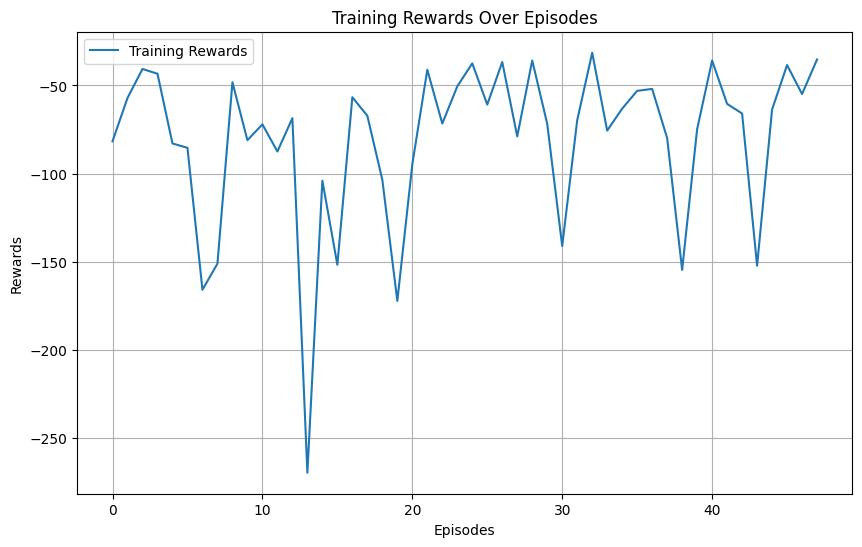

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards[:48],  label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()

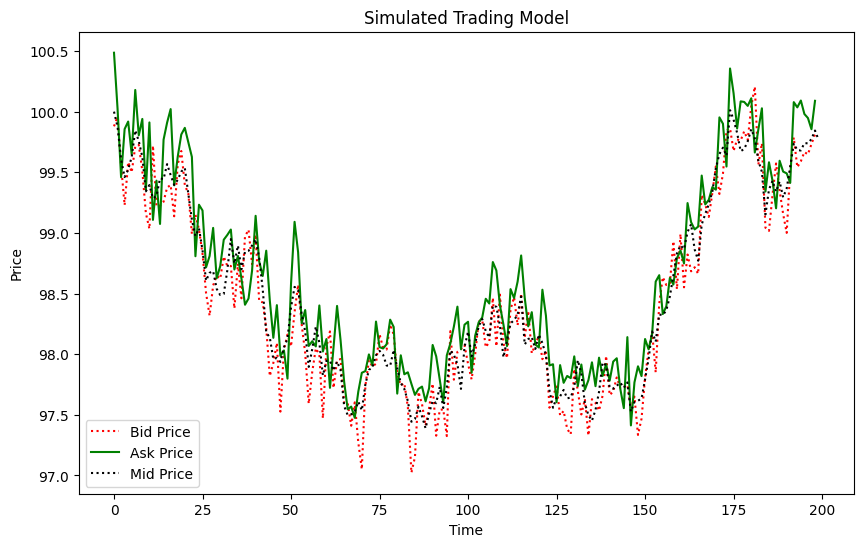

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(t, res_price_array, label='Res Price')

plt.plot(env.Bid, label='Bid Price', color='red', linestyle='dotted')
plt.plot(env.Ask, label='Ask Price', color='green', linestyle='-')
plt.plot(env.s, label='Mid Price', color='black', linestyle='dotted')

plt.title('Simulated Trading Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()